In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Correlation

In [2]:
df = pd.read_csv('git_extraction/DF_Radiomics_noduls_with_diagnose_train_data.csv')

In [3]:
df.head()

,Patient,Node,Labels,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_firstorder_10Percentile,original_firstorder_90Percentile,...,diagnostics_Mask-original_BoundingBox_2,diagnostics_Mask-original_BoundingBox_3,diagnostics_Mask-original_BoundingBox_4,diagnostics_Mask-original_BoundingBox_5,diagnostics_Mask-original_CenterOfMassIndex_0,diagnostics_Mask-original_CenterOfMassIndex_1,diagnostics_Mask-original_CenterOfMassIndex_2,diagnostics_Mask-original_CenterOfMass_0,diagnostics_Mask-original_CenterOfMass_1,diagnostics_Mask-original_CenterOfMass_2
0,LIDC-IDRI-0137,Node_N1,3,-671.885608,-2048.0,3071.0,26,1,175.5,850.5,...,30,4,6,2,332.692308,389.538462,30.307692,53.215868,83.626926,-321.730769
1,LIDC-IDRI-0377,Node_N1,2,-882.321409,-3024.0,3071.0,2402,1,-307.0,61.0,...,169,29,24,9,382.402998,308.854288,173.039550,92.739302,28.898399,-68.460564
2,LIDC-IDRI-0167,Node_N1,1,-664.766231,-2048.0,3071.0,56,1,-444.5,-66.5,...,50,6,9,2,70.267857,174.964286,50.321429,-136.237780,-53.812866,-234.696429
3,LIDC-IDRI-0272,Node_N1,3,-824.358062,-2048.0,3071.0,51,1,-447.0,102.0,...,81,6,7,2,209.313725,390.941176,81.568627,-47.673652,80.722794,-109.078431
4,LIDC-IDRI-0234,Node_N1,1,-708.012378,-2048.0,3029.0,251,1,-569.0,82.0,...,41,11,14,3,367.756972,310.848606,41.689243,65.179121,43.765426,-236.276892


In [4]:
df.describe()

,Labels,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,...,diagnostics_Mask-original_BoundingBox_2,diagnostics_Mask-original_BoundingBox_3,diagnostics_Mask-original_BoundingBox_4,diagnostics_Mask-original_BoundingBox_5,diagnostics_Mask-original_CenterOfMassIndex_0,diagnostics_Mask-original_CenterOfMassIndex_1,diagnostics_Mask-original_CenterOfMassIndex_2,diagnostics_Mask-original_CenterOfMass_0,diagnostics_Mask-original_CenterOfMass_1,diagnostics_Mask-original_CenterOfMass_2
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000,...,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,2.109312,-812.114383,-2169.785425,3272.720648,1511.765182,1.040486,-456.829555,109.939676,3.093523e+08,4.391201,...,82.477733,16.425101,17.574899,5.886640,269.922457,295.507630,84.926912,5.750866,31.431356,-176.743313
std,0.850750,79.622532,318.153754,1852.761417,3018.467889,0.251783,214.458433,433.363864,1.600967e+09,0.697244,...,54.294276,13.085765,13.691188,4.919195,105.572325,62.603881,55.299117,79.647726,47.083494,67.825010
min,1.000000,-1060.053323,-3024.000000,1433.000000,9.000000,1.000000,-977.000000,-868.000000,4.019700e+04,2.058814,...,16.000000,3.000000,3.000000,1.000000,70.096154,124.777778,20.307399,-165.429959,-96.407935,-321.730769
25%,1.000000,-847.960683,-2048.000000,3071.000000,96.000000,1.000000,-573.800000,-37.200000,1.019299e+07,4.066642,...,48.000000,7.500000,8.000000,3.000000,171.389050,257.438380,50.139309,-66.692071,1.343186,-224.088068
50%,2.000000,-807.289508,-2048.000000,3071.000000,195.000000,1.000000,-451.000000,51.000000,2.638430e+07,4.457243,...,70.000000,11.000000,11.000000,4.000000,306.251534,307.552434,73.176136,29.822032,36.248825,-176.423077
75%,3.000000,-753.638585,-2048.000000,3071.000000,1415.500000,1.000000,-347.200000,115.500000,8.854804e+07,4.803005,...,93.000000,21.500000,24.500000,7.000000,359.054558,341.987226,94.120014,73.416244,69.507265,-123.085220
max,3.000000,-651.262213,-2048.000000,17739.000000,20671.000000,4.000000,282.400000,1624.000000,1.724990e+10,6.146215,...,335.000000,63.000000,69.000000,26.000000,455.928230,440.288889,340.955511,129.459821,116.878128,-10.861981


Text(0.5, 1.0, 'Class distribution')

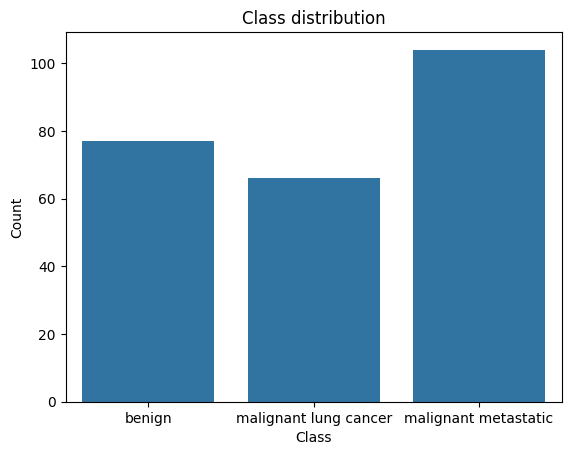

In [20]:
# Create a count plot using Seaborn
sns.countplot(x='Labels', data=df)

# Adding labels and title
plt.xticks(ticks=[0, 1, 2], labels=['benign', 'malignant lung cancer', 'malignant metastatic'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class distribution')

All columns starting with 'diagnostics' only contain general information about the image and are not features.

In [6]:
# Select columns that start with 'diagnostics'
diagnostics_columns = df.filter(like='diagnostics', axis=1)

# Drop columns starting with 'diagnostics'
df = df.drop(diagnostics_columns.columns, axis=1)

In [7]:
# Calculate correlation matrix
correlation_matrix = df.drop(['Patient', 'Node', 'Labels'], axis=1).corr()

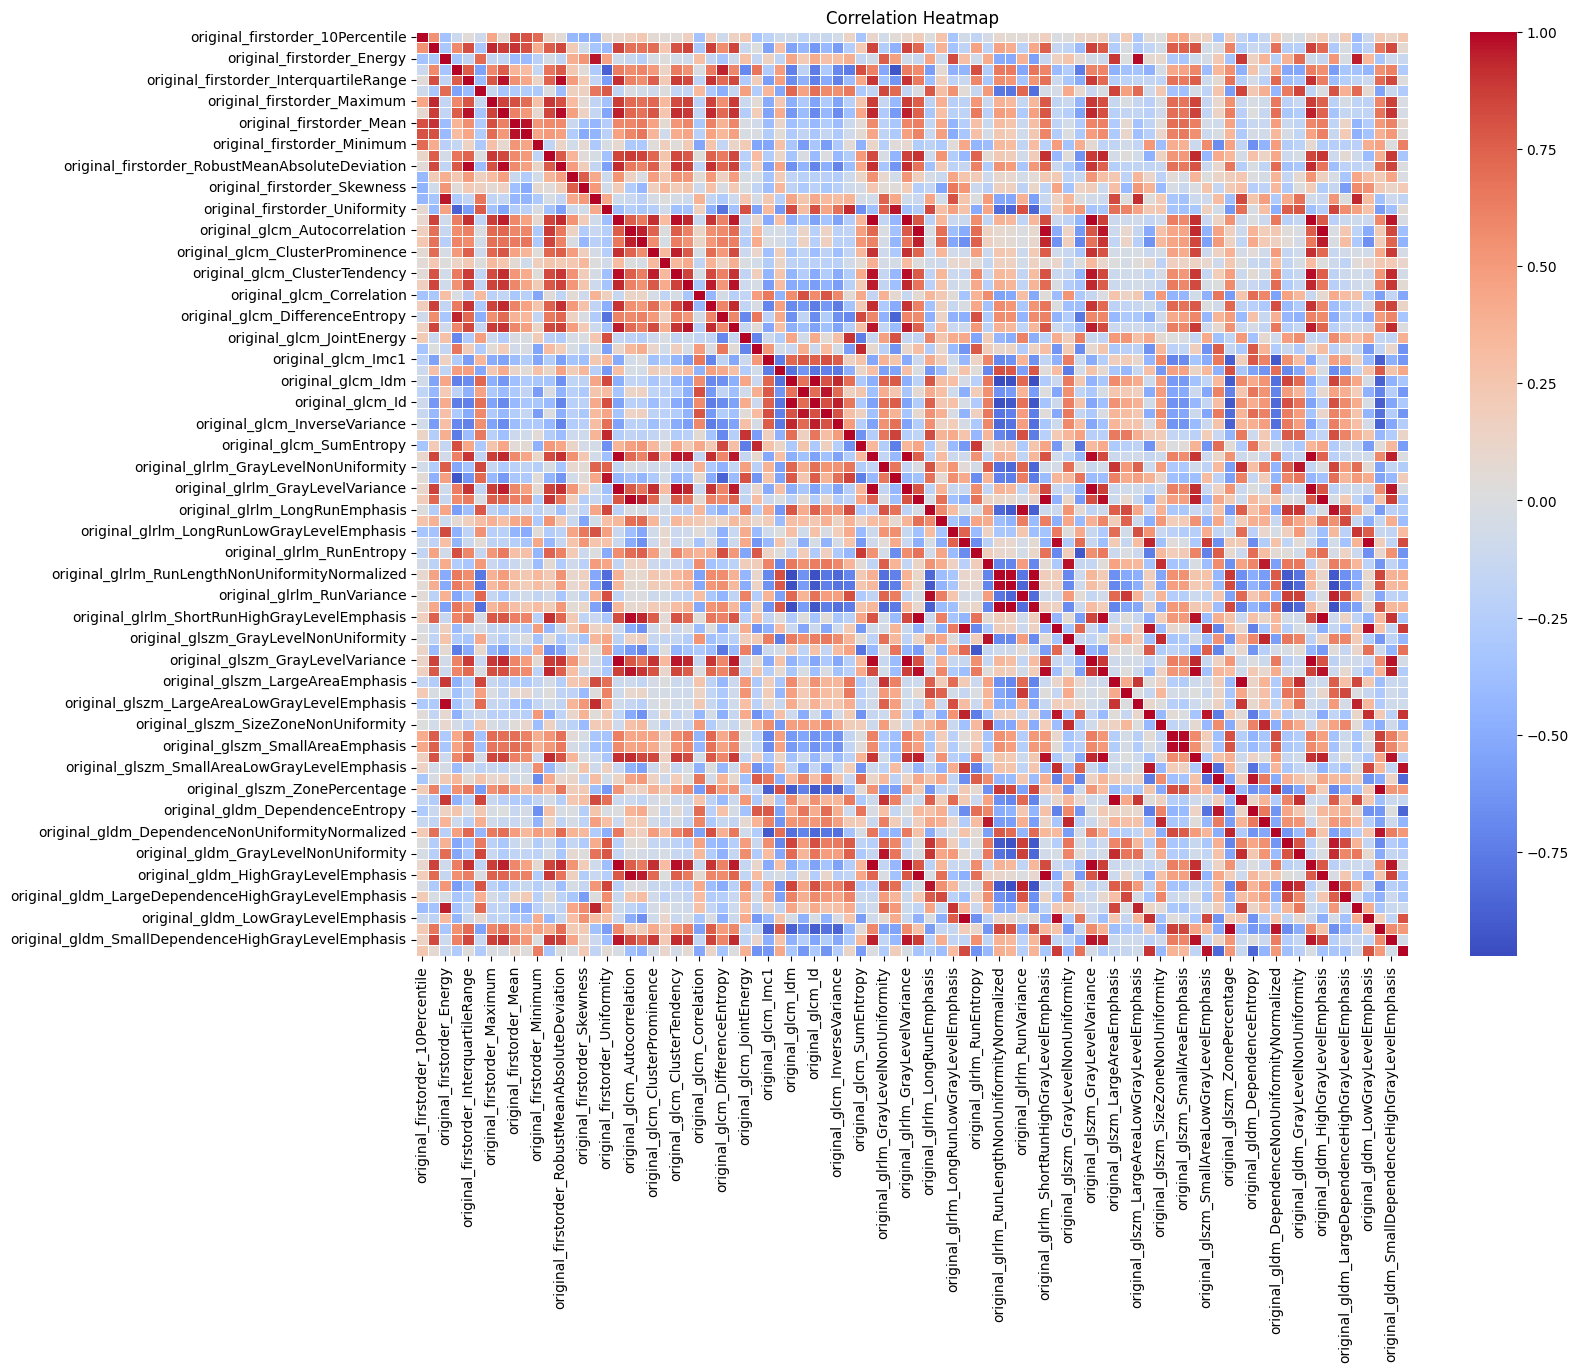

In [8]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1600x1200 with 0 Axes>

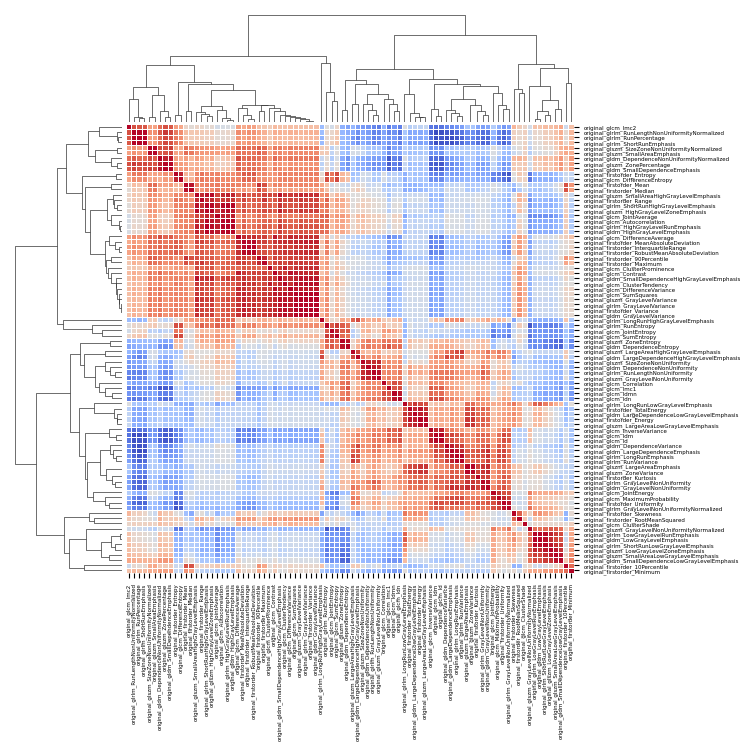

In [16]:
# Use clustermap to order the rows and columns based on similarity
plt.figure(figsize=(16, 12))
sns.clustermap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5, cbar_pos=None, xticklabels=True, yticklabels=True)
plt.tick_params(labelsize=4)

plt.show()

# PCA

In [12]:
# For PCA we need standardized features
df = pd.read_csv('git_extraction/DF_Radiomics_noduls_with_diagnose_train_data_scaled.csv')

In [13]:
# Select columns that start with 'diagnostics'
diagnostics_columns = df.filter(like='diagnostics', axis=1)

# Drop columns starting with 'diagnostics'
df = df.drop(diagnostics_columns.columns, axis=1)

In [14]:
# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(df.drop(['Patient', 'Node', 'Labels'], axis=1))

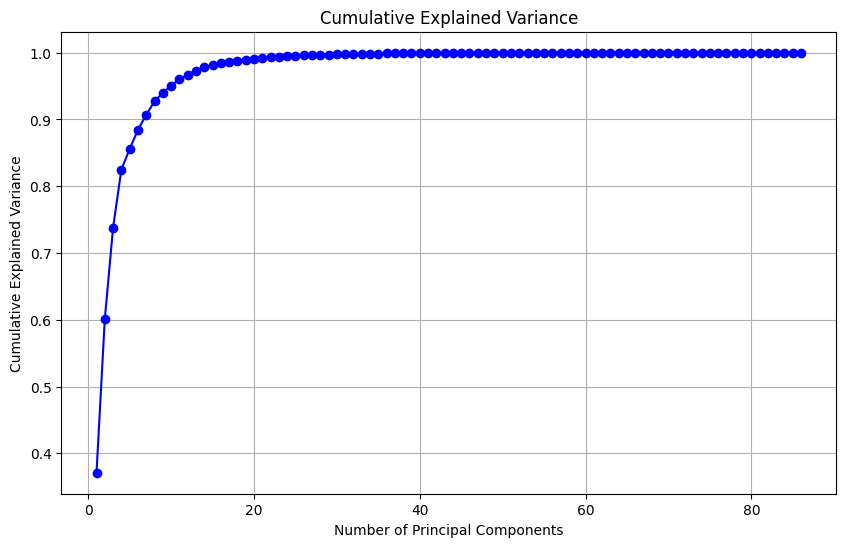

In [15]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# RF-Feature Importance

In [39]:
df = pd.read_csv('git_extraction/DF_Radiomics_noduls_with_diagnose_train_data.csv')

In [40]:
# Select columns that start with 'diagnostics'
diagnostics_columns = df.filter(like='diagnostics', axis=1)

# Drop columns starting with 'diagnostics'
df = df.drop(diagnostics_columns.columns, axis=1)

In [41]:
# split features and labels
X_train = df.drop(['Patient', 'Node', 'Labels'], axis=1)
y_train = df['Labels']

In [42]:
# Create a Random Forest classifier
rf_clf = RandomForestClassifier()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

# Print the best parameters
print("Best Parameters for Random Forest:")
print(best_params_rf)

Best Parameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [43]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100,
                            max_depth=10,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            random_state=42)

# Fit the model
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

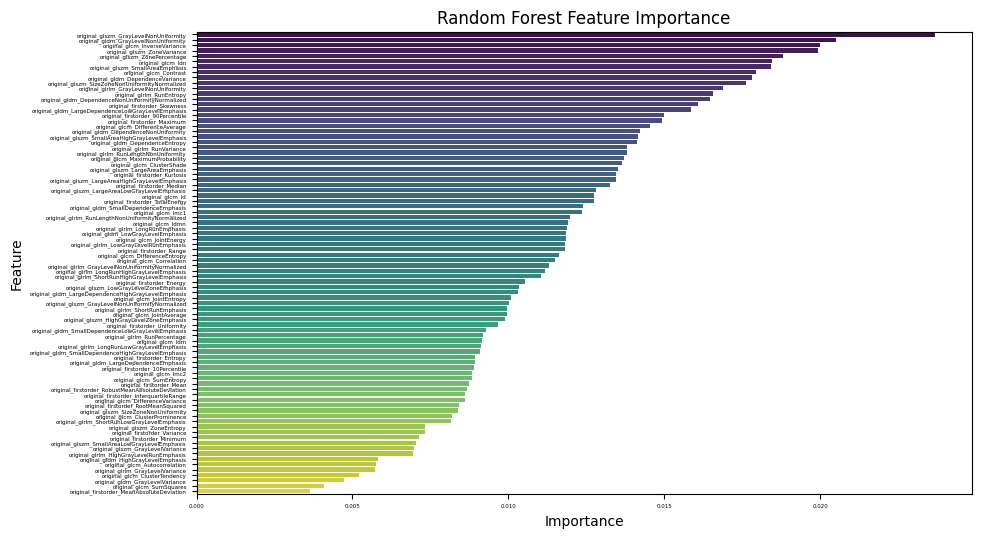

In [44]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance_df, palette='viridis', legend=False)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tick_params(labelsize=4)
plt.show()

In [48]:
df_test = pd.read_csv('git_extraction/DF_Radiomics_noduls_with_diagnose_test_data.csv')

# Select columns that start with 'diagnostics'
diagnostics_columns = df_test.filter(like='diagnostics', axis=1)

# Drop columns starting with 'diagnostics'
df_test = df_test.drop(diagnostics_columns.columns, axis=1)

In [49]:
# split features and labels
X_test = df_test.drop(['Patient', 'Node', 'Labels'], axis=1)
y_test = df_test['Labels']

In [50]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance on the training data
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.66
Confusion Matrix:
[[11  4  5]
 [ 3  8  5]
 [ 3  1 22]]
Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.55      0.59        20
           2       0.62      0.50      0.55        16
           3       0.69      0.85      0.76        26

    accuracy                           0.66        62
   macro avg       0.65      0.63      0.63        62
weighted avg       0.66      0.66      0.65        62



# Decision Tree

In [23]:
df = pd.read_csv('git_extraction/DF_Radiomics_noduls_with_diagnose_train_data.csv')

# Select columns that start with 'diagnostics'
diagnostics_columns = df.filter(like='diagnostics', axis=1)

# Drop columns starting with 'diagnostics'
df = df.drop(diagnostics_columns.columns, axis=1)

In [24]:
# split features and labels
X_train = df.drop(['Patient', 'Node', 'Labels'], axis=1)
y_train = df['Labels']

In [29]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:")
print(best_params)

Best Parameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [30]:
df_test = pd.read_csv('git_extraction/DF_Radiomics_noduls_with_diagnose_test_data.csv')

# Select columns that start with 'diagnostics'
diagnostics_columns = df_test.filter(like='diagnostics', axis=1)

# Drop columns starting with 'diagnostics'
df_test = df_test.drop(diagnostics_columns.columns, axis=1)

In [31]:
# split features and labels
X_test = df_test.drop(['Patient', 'Node', 'Labels'], axis=1)
y_test = df_test['Labels']

In [32]:
# Create a decision tree classifier with the best hyperparameters found
clf = DecisionTreeClassifier(criterion='entropy', 
                             max_depth=10,
                             min_samples_leaf=2,
                             min_samples_split=2)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance on the training data
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.56
Confusion Matrix:
[[ 9  3  8]
 [ 3  7  6]
 [ 4  3 19]]
Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.45      0.50        20
           2       0.54      0.44      0.48        16
           3       0.58      0.73      0.64        26

    accuracy                           0.56        62
   macro avg       0.56      0.54      0.54        62
weighted avg       0.56      0.56      0.56        62



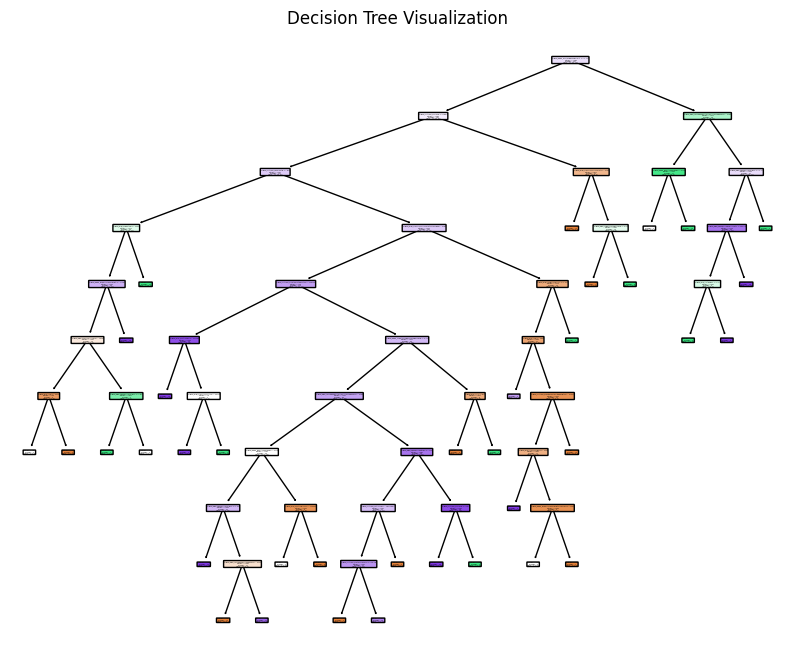

In [33]:
# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True, feature_names=X_train.columns, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()
